In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
os.getcwd()
os.chdir('/Users/susovan/Desktop/springboard doc/capstone2')

In [2]:
#Data Loading
df = pd.read_csv('train.csv')

In [18]:
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
#Data Organization
os.mkdir('Capstone BlackFriday Project')

In [5]:
#Data Definition
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
df.isnull().values.any() 

True

In [11]:
a=df.nunique()
a

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [12]:
#percent of unique values per column
pd.DataFrame(a/len(df) * 100,columns = ['percent'])

,percent
User_ID,1.070958
Product_ID,0.660100
Gender,0.000364
Age,0.001273
Occupation,0.003818
City_Category,0.000545
Stay_In_Current_City_Years,0.000909
Marital_Status,0.000364
Product_Category_1,0.003636
Product_Category_2,0.003091


In [13]:
df['Product_Category_1'].value_counts

<bound method IndexOpsMixin.value_counts of 0          3
1          1
2         12
3         12
4          8
          ..
550063    20
550064    20
550065    20
550066    20
550067    20
Name: Product_Category_1, Length: 550068, dtype: int64>

In [14]:
df['Product_Category_2'].value_counts

<bound method IndexOpsMixin.value_counts of 0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: Product_Category_2, Length: 550068, dtype: float64>

In [15]:
df['Product_Category_3'].value_counts

<bound method IndexOpsMixin.value_counts of 0          NaN
1         14.0
2          NaN
3          NaN
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: Product_Category_3, Length: 550068, dtype: float64>

In [16]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
Product_Category_3,0.696727
Product_Category_2,0.315666


In [23]:
df['Product_Category_2'].fillna(0, inplace = True)

In [24]:
df['Product_Category_3'].fillna(0, inplace = True)

In [25]:
df.isnull().values.any() 

False

In [26]:
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


In [27]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


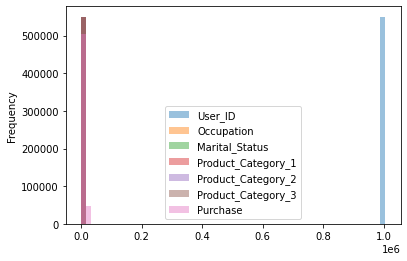

In [40]:
hx = df.plot.hist(bins=60, alpha=0.45)

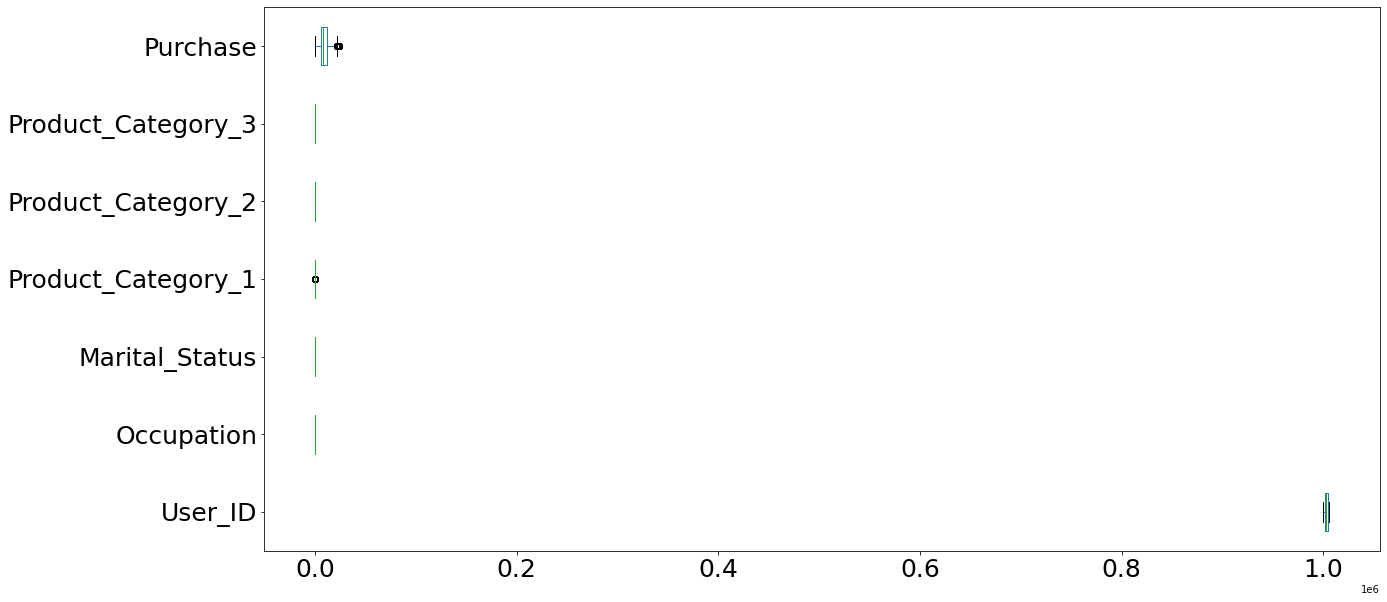

In [51]:
f, ax = plt.subplots(figsize=(20, 10))
df.boxplot(grid=False, vert=False,fontsize=25, figsize=(10,20))

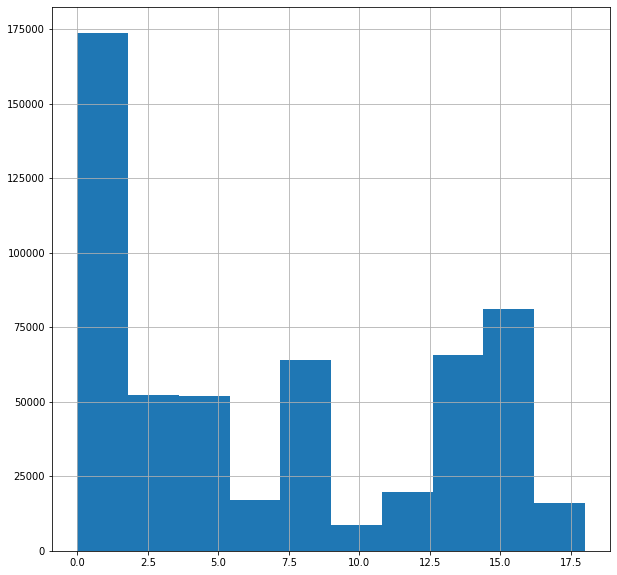

In [52]:
df['Product_Category_2'].hist(bins=10,figsize =(10,10))

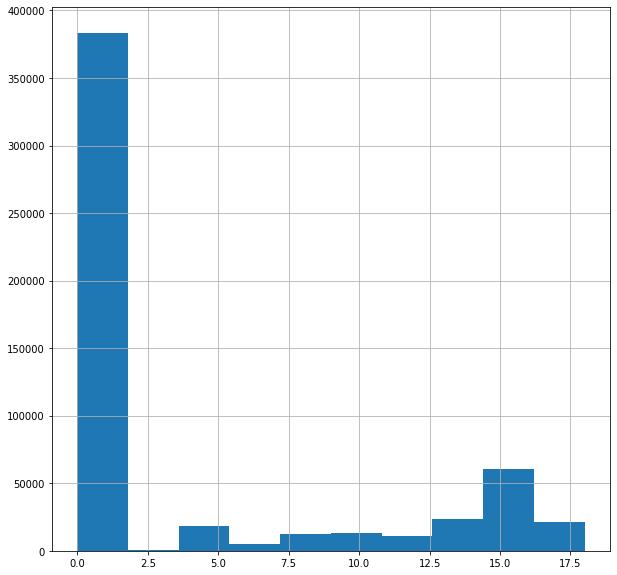

In [53]:
df['Product_Category_3'].hist(bins=10,figsize =(10,10))

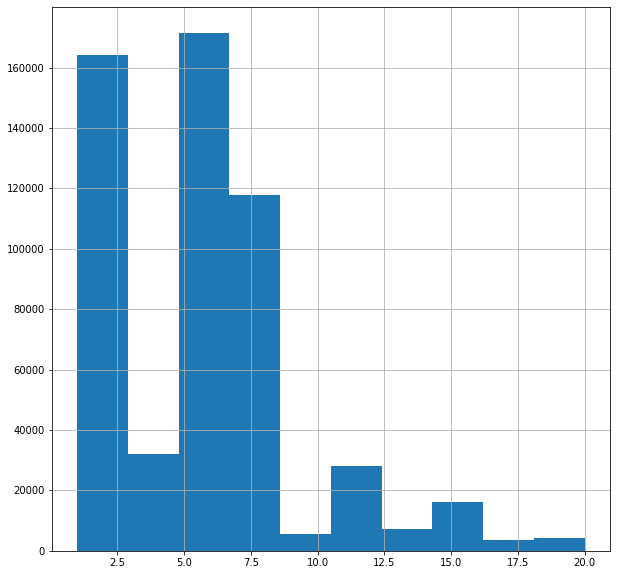

In [54]:
df['Product_Category_1'].hist(bins=10,figsize =(10,10))

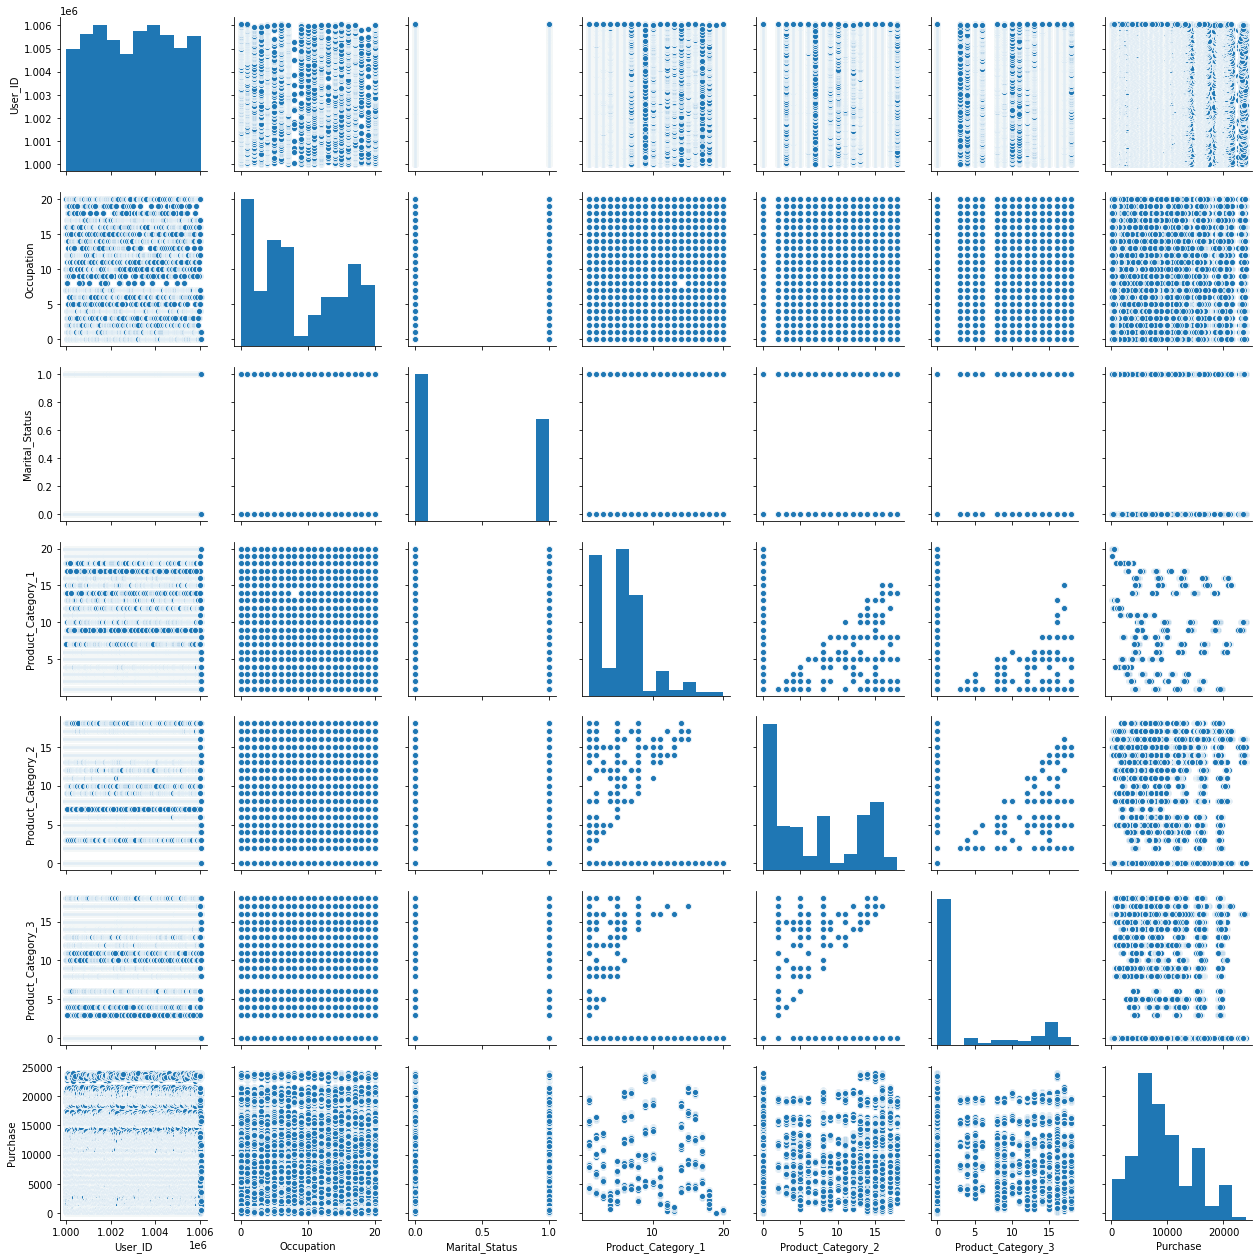

In [57]:
sns.pairplot(df)
plt.show()

In [67]:
#Calculate the correlation coefficients
corr = df.corr()
print(corr)
corr.isna()

corr.round(2).style.background_gradient(cmap='coolwarm')

                     User_ID  Occupation  Marital_Status  Product_Category_1  \
User_ID             1.000000   -0.023971        0.020443            0.003825   
Occupation         -0.023971    1.000000        0.024280           -0.007618   
Marital_Status      0.020443    0.024280        1.000000            0.019888   
Product_Category_1  0.003825   -0.007618        0.019888            1.000000   
Product_Category_2  0.003896    0.006712        0.001099           -0.067877   
Product_Category_3  0.003605    0.012269       -0.004629           -0.385534   
Purchase            0.004716    0.020833       -0.000463           -0.343703   

                    Product_Category_2  Product_Category_3  Purchase  
User_ID                       0.003896            0.003605  0.004716  
Occupation                    0.006712            0.012269  0.020833  
Marital_Status                0.001099           -0.004629 -0.000463  
Product_Category_1           -0.067877           -0.385534 -0.343703  
Prod

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.020000,0.020000,0.000000,0.000000,0.000000,0.000000
Occupation,-0.020000,1.000000,0.020000,-0.010000,0.010000,0.010000,0.020000
Marital_Status,0.020000,0.020000,1.000000,0.020000,0.000000,-0.000000,-0.000000
Product_Category_1,0.000000,-0.010000,0.020000,1.000000,-0.070000,-0.390000,-0.340000
Product_Category_2,0.000000,0.010000,0.000000,-0.070000,1.000000,0.090000,0.050000
Product_Category_3,0.000000,0.010000,-0.000000,-0.390000,0.090000,1.000000,0.290000
Purchase,0.000000,0.020000,-0.000000,-0.340000,0.050000,0.290000,1.000000


In [75]:
data = df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']]
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper)

                    Product_Category_1  Product_Category_2  Product_Category_3
Product_Category_1                 NaN            0.067877            0.385534
Product_Category_2                 NaN                 NaN            0.094750
Product_Category_3                 NaN                 NaN                 NaN


In [76]:
to_drop =[column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

[]
